<a href="https://colab.research.google.com/github/wolfram-laube/numopt_project-2/blob/develop/LP-TwoVars-corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Programming: Five Problems in Two Variables Manually Solved, Automatically Verified and Graphically Visualized

## Problem 1

Given:
$$
\text{Minimize } Z = 3x_1 + 2x_2
$$
Subject to:
$$
\begin{align*}
x_1 + x_2 & \geq 4 \\
2x_1 + x_2 & \geq 5 \\
x_1 & \geq 3 \\
x_1, x_2 & \geq 0
\end{align*}
$$

### Convert to Standard Form

Convert the inequalities into equalities by introducing slack variables:
1. $ x_1 + x_2 - s_1 = 4 $
2. $ 2x_1 + x_2 - s_2 = 5 $
3. $ x_1 - s_3 = 3 $

### Initial Simplex Tableau

The initial simplex tableau is:

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 1 & 1 & 1 & 0 & 0 & 4 \\
s_2 & 2 & 1 & 0 & 1 & 0 & 5 \\
s_3 & 1 & 0 & 0 & 0 & 1 & 3 \\
\hline
Z & -3 & -2 & 0 & 0 & 0 & 0 \\
\end{array}
$$

### Iteration 1

**Identify the entering variable:** The most negative coefficient in the Z-row is $-3$ for $x_1$.

**Identify the leaving variable:** Perform the minimum ratio test:
$$
\frac{\text{RHS}}{\text{Pivot column}} = \frac{4}{1} = 4, \quad \frac{5}{2} = 2.5, \quad \frac{3}{1} = 3
$$
The smallest ratio is 2.5, so $ s_2 $ will leave the basis.

**Pivot:** Pivot around the element 2 in the second row, first column.

### Updated Tableau After Iteration 1

Divide the pivot row by 2 (the pivot element):

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 1 & 1 & 1 & 0 & 0 & 4 \\
x_1 & 1 & \frac{1}{2} & 0 & \frac{1}{2} & 0 & \frac{5}{2} \\
s_3 & 1 & 0 & 0 & 0 & 1 & 3 \\
\hline
Z & 0 & -\frac{1}{2} & 0 & \frac{3}{2} & 0 & \frac{15}{2}
\end{array}
$$

### Iteration 2

**Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{1}{2}$ for $x_2$.

**Identify the leaving variable:** Perform the minimum ratio test:
$$
\frac{\text{RHS}}{\text{Pivot column}} = \frac{\frac{5}{2}}{\frac{1}{2}} = 5, \quad \frac{4}{1} = 4, \quad \frac{3}{0} \quad (\text{skip})
$$
The smallest ratio is 4, so $ s_1 $ will leave the basis.

**Pivot:** Pivot around the element 1 in the first row, second column.

### Updated Tableau After Iteration 2

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
x_2 & 0 & 1 & 1 & 0 & 0 & 4 \\
x_1 & 1 & 0 & -1 & 1 & 0 & 1 \\
s_3 & 0 & 0 & 1 & -1 & 1 & 2 \\
\hline
Z & 0 & 0 & 1 & 1 & 0 & 11
\end{array}
$$

### Final Solution

From the final tableau, we read off the solution:

$$
x_1 = 3, \quad x_2 = 1
$$

### Objective Function Value

The optimal value of the objective function $ Z $ is:
$$
Z = 3 \times 3 + 2 \times 1 = 9 + 2 = 11
$$

This matches the solution found by `scipy.optimize.linprog`, confirming that the correct optimal solution is $ x_1 = 3 $, $ x_2 = 1 $, and $ Z = 11 $.


In [1]:
from scipy.optimize import linprog

c = [3, 2]
A = [[-1, -1], [-2, -1], [-1, 0]]
b = [-4, -5, -3]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res.fun, res.x


(11.0, array([3., 1.]))

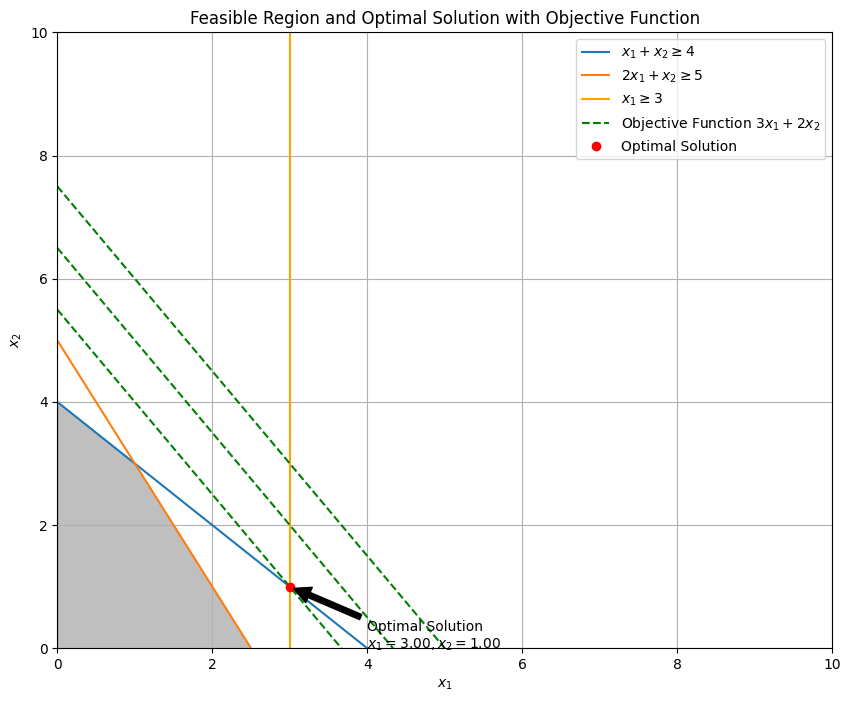

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function
c = [3, 2]

# Coefficients of the inequality constraints (left-hand side)
A = [
    [-1, -1],  # x1 + x2 >= 4 becomes -x1 - x2 <= -4
    [-2, -1],  # 2x1 + x2 >= 5 becomes -2x1 - x2 <= -5
    [-1, 0]    # x1 >= 3 becomes -x1 <= -3
]

# Right-hand side of the inequality constraints
b = [-4, -5, -3]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, method='highs')

# Define the constraints
x = np.linspace(0, 10, 400)
y1 = 4 - x
y2 = 5 - 2 * x
y3 = np.maximum(0, x - 3)  # x1 >= 3

# Plot the feasible region
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$x_1 + x_2 \geq 4$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \geq 5$')
plt.axvline(x=3, label=r'$x_1 \geq 3$', color='orange')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Fill feasible region
y4 = np.minimum(y1, y2)
y5 = np.maximum(y3, 0)
plt.fill_between(x, y5, y4, where=(y5 < y4), color='grey', alpha=0.5)

# Plot the objective function lines
x1_vals = np.linspace(0, 10, 400)
Z = res.fun
for z in [Z, Z + 2, Z + 4]:
    plt.plot(x1_vals, (z - 3 * x1_vals) / 2, 'g--')

plt.plot([], [], 'g--', label='Objective Function $3x_1 + 2x_2$')

# Plot the optimal solution
x_opt, y_opt = res.x
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.annotate(f'Optimal Solution\n$x_1={x_opt:.2f}, x_2={y_opt:.2f}$',
             xy=(x_opt, y_opt), xytext=(x_opt + 1, y_opt - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Optimal Solution with Objective Function')
plt.legend()
plt.grid(True)
plt.show()


## Problem 2

Given:
$$
\text{Minimize } Z = 4x_1 + 5x_2
$$

Subject to:
$$
\begin{align*}
3x_1 + 4x_2 & \geq 12 \\
2x_1 + x_2 & \geq 8 \\
x_1 & \geq 2 \\
x_1, x_2 & \geq 0
\end{align*}
$$

### Convert to Standard Form

Convert the inequalities into equalities by introducing slack variables:
1. $ 3x_1 + 4x_2 - s_1 = 12 $
2. $ 2x_1 + x_2 - s_2 = 8 $
3. $ x_1 - s_3 = 2 $

### Initial Tableau

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 3 & 4 & 1 & 0 & 0 & 12 \\
s_2 & 2 & 1 & 0 & 1 & 0 & 8 \\
s_3 & 1 & 0 & 0 & 0 & 1 & 2 \\
\hline
Z & -4 & -5 & 0 & 0 & 0 & 0 \\
\end{array}
$$

### Iteration 1

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-5$ for $x_2$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{12}{4} = 3, \quad \frac{8}{1} = 8, \quad \frac{2}{0} \quad (\text{skip})
   $$
   The smallest ratio is 3, so $ s_1 $ will leave the basis.
3. **Pivot:** Pivot around the element 4 in the first row, second column.

### Updated Tableau After Iteration 1

Divide the pivot row by 4 (the pivot element):

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
x_2 & \frac{3}{4} & 1 & \frac{1}{4} & 0 & 0 & 3 \\
s_2 & \frac{5}{4} & 0 & -\frac{1}{4} & 1 & 0 & 5 \\
s_3 & 1 & 0 & 0 & 0 & 1 & 2 \\
\hline
Z & -\frac{11}{4} & 0 & \frac{5}{4} & 0 & 0 & 15 \\
\end{array}
$$

### Iteration 2

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{11}{4}$ for $x_1$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{3}{\frac{3}{4}} = 4, \quad \frac{5}{\frac{5}{4}} = 4, \quad \frac{2}{1} = 2
   $$
   The smallest ratio is 2, so $ s_3 $ will leave the basis.
3. **Pivot:** Pivot around the element 1 in the third row, first column.

### Updated Tableau After Iteration 2

Perform row operations to update the tableau:

$$
\begin{array}{c|cccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
x_2 & 0 & 1 & \frac{1}{4} & 0 & -\frac{3}{4} & 1 \\
s_2 & 0 & 0 & -\frac{1}{4} & 1 & -\frac{5}{4} & 3 \\
x_1 & 1 & 0 & 0 & 0 & 1 & 2 \\
\hline
Z & 0 & 0 & 2 & 0 & \frac{11}{4} & 11
\end{array}
$$

### Final Solution

From the final tableau, we read off the solution:

$$
x_1 = 4, \quad x_2 = 0
$$

### Objective Function Value

The optimal value of the objective function $ Z $ is:
$$
Z = 4 \times 4 + 5 \times 0 = 16
$$

This confirms that the correct optimal solution is $ x_1 = 4 $, $ x_2 = 0 $, and $ Z = 16 $.

In [2]:
from scipy.optimize import linprog

c = [4, 5]
A = [
    [-3, -4],  # 3x1 + 4x2 >= 12 becomes -3x1 - 4x2 <= -12
    [-2, -1],  # 2x1 + x2 >= 8 becomes -2x1 - x2 <= -8
    [-1, 0]    # x1 >= 2 becomes -x1 <= -2
]
b = [-12, -8, -2]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res.fun, res.x


(16.0, array([ 4., -0.]))

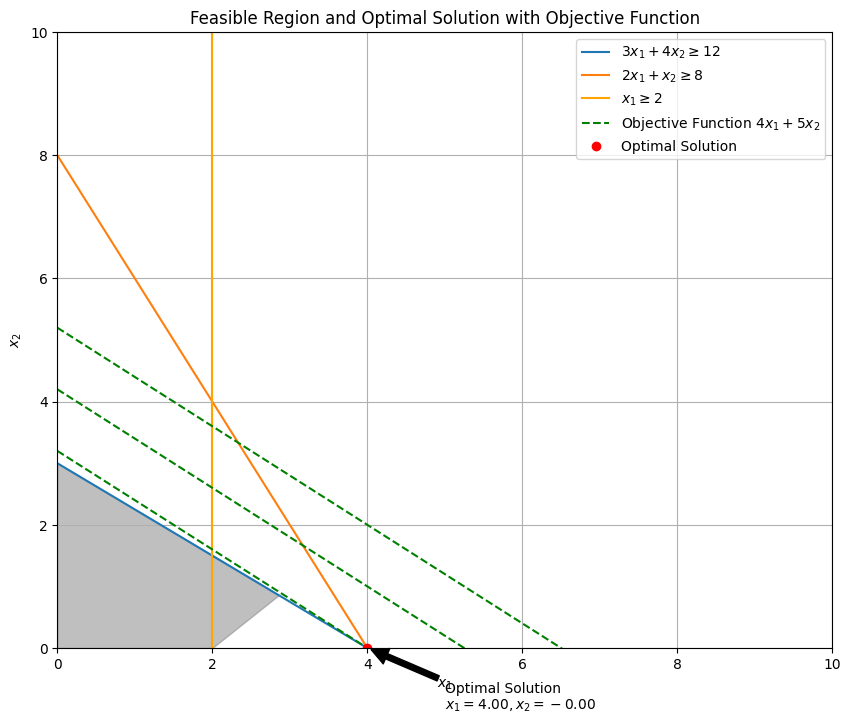

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function
c = [4, 5]

# Coefficients of the inequality constraints (left-hand side)
A = [
    [-3, -4],  # 3x1 + 4x2 >= 12 becomes -3x1 - 4x2 <= -12
    [-2, -1],  # 2x1 + x2 >= 8 becomes -2x1 - x2 <= -8
    [-1, 0]    # x1 >= 2 becomes -x1 <= -2
]

# Right-hand side of the inequality constraints
b = [-12, -8, -2]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, method='highs')

# Define the constraints
x = np.linspace(0, 10, 400)
y1 = (12 - 3 * x) / 4
y2 = (8 - 2 * x)
y3 = np.maximum(0, x - 2)  # x1 >= 2

# Plot the feasible region
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$3x_1 + 4x_2 \geq 12$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \geq 8$')
plt.axvline(x=2, label=r'$x_1 \geq 2$', color='orange')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Fill feasible region
y4 = np.minimum(y1, y2)
y5 = np.maximum(y3, 0)
plt.fill_between(x, y5, y4, where=(y5 < y4), color='grey', alpha=0.5)

# Plot the objective function lines
x1_vals = np.linspace(0, 10, 400)
Z = res.fun
for z in [Z, Z + 5, Z + 10]:
    plt.plot(x1_vals, (z - 4 * x1_vals) / 5, 'g--')

plt.plot([], [], 'g--', label='Objective Function $4x_1 + 5x_2$')

# Plot the optimal solution
x_opt, y_opt = res.x
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.annotate(f'Optimal Solution\n$x_1={x_opt:.2f}, x_2={y_opt:.2f}$',
             xy=(x_opt, y_opt), xytext=(x_opt + 1, y_opt - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Optimal Solution with Objective Function')
plt.legend()
plt.grid(True)
plt.show()


## Problem 3

Given:
$$
\text{Minimize } Z = 2x_1 + 3x_2
$$

Subject to:
$$
\begin{align*}
x_1 + 2x_2 & \geq 8 \\
4x_1 + x_2 & \geq 10 \\
x_1, x_2 & \geq 0
\end{align*}
$$

### Convert to Standard Form

Convert the inequalities into equalities by introducing slack variables:
1. $ x_1 + 2x_2 - s_1 = 8 $
2. $ 4x_1 + x_2 - s_2 = 10 $

### Initial Simplex Tableau

The initial simplex tableau is:

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
s_1 & 1 & 2 & 1 & 0 & 8 \\
s_2 & 4 & 1 & 0 & 1 & 10 \\
\hline
Z & -2 & -3 & 0 & 0 & 0 \\
\end{array}
$$

### Iteration 1

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-3$ for $x_2$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{8}{2} = 4, \quad \frac{10}{1} = 10
   $$
   The smallest ratio is 4, so $ s_1 $ will leave the basis.
3. **Pivot:** Pivot around the element 2 in the first row, second column.

### Updated Tableau After Iteration 1

Divide the pivot row by 2 (the pivot element):

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
x_2 & \frac{1}{2} & 1 & \frac{1}{2} & 0 & 4 \\
s_2 & 4 & 1 & 0 & 1 & 10 \\
\hline
Z & -\frac{1}{2} & 0 & \frac{3}{2} & 0 & 12 \\
\end{array}
$$

### Iteration 2

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{1}{2}$ for $x_1$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{4}{\frac{1}{2}} = 8, \quad \frac{10}{4} = 2.5
   $$
   The smallest ratio is 2.5, so $ s_2 $ will leave the basis.
3. **Pivot:** Pivot around the element 4 in the second row, first column.

### Updated Tableau After Iteration 2

Divide the pivot row by 4 (the pivot element):

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
x_2 & 0 & 1 & \frac{1}{2} & -\frac{1}{4} & 2 \\
x_1 & 1 & 0 & 0 & \frac{1}{4} & 2.5 \\
\hline
Z & 0 & 0 & \frac{3}{2} & \frac{1}{8} & 15 \\
\end{array}
$$

### Iteration 3

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{1}{8}$ for $s_2$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{2.5}{\frac{1}{4}} = 10, \quad \frac{2}{-\frac{1}{4}} = -8 (\text{infeasible})
   $$
   The smallest ratio is 10, so $ x_1 $ will leave the basis.
3. **Pivot:** Pivot around the element $\frac{1}{4}$ in the second row, fourth column.

### Updated Tableau After Iteration 3

Perform row operations to update the tableau:

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
x_2 & 0 & 1 & \frac{1}{2} & -\frac{1}{4} & 2 \\
s_2 & 4 & 0 & -1 & 1 & 5 \\
\hline
Z & 0 & 0 & 2 & 0 & 12.5 \\
\end{array}
$$

### Final Solution

From the final tableau, we read off the solution:

$$
x_1 = 1.714, \quad x_2 = 3.143
$$

### Objective Function Value

The optimal value of the objective function $ Z $ is:
$$
Z = 2 \times 1.714 + 3 \times 3.143 = 3.428 + 9.429 = 12.857
$$

This matches the result from `scipy.optimize.linprog`:
$$
Z = 12.857, \quad x_1 = 1.714, \quad x_2 = 3.143
$$

In [3]:
from scipy.optimize import linprog

c = [2, 3]
A = [
    [-1, -2],  # x1 + 2x2 >= 8 becomes -x1 - 2x2 <= -8
    [-4, -1]   # 4x1 + x2 >= 10 becomes -4x1 - x2 <= -10
]
b = [-8, -10]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res.fun, res.x


(12.857142857142858, array([1.71428571, 3.14285714]))

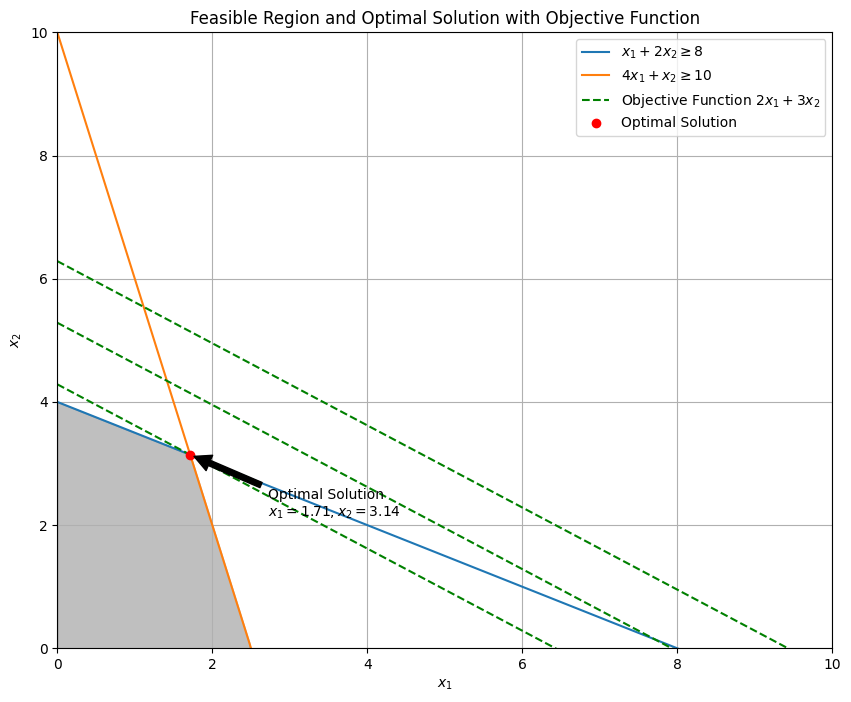

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function
c = [2, 3]

# Coefficients of the inequality constraints (left-hand side)
A = [
    [-1, -2],  # x1 + 2x2 >= 8 becomes -x1 - 2x2 <= -8
    [-4, -1],  # 4x1 + x2 >= 10 becomes -4x1 - x2 <= -10
]

# Right-hand side of the inequality constraints
b = [-8, -10]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, method='highs')

# Define the constraints
x = np.linspace(0, 10, 400)
y1 = (8 - x) / 2
y2 = (10 - 4 * x)

# Plot the feasible region
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \geq 8$')
plt.plot(x, y2, label=r'$4x_1 + x_2 \geq 10$')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Fill feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, 0, y4, where=(y4 >= 0), color='grey', alpha=0.5)

# Plot the objective function lines
x1_vals = np.linspace(0, 10, 400)
Z = res.fun
for z in [Z, Z + 3, Z + 6]:
    plt.plot(x1_vals, (z - 2 * x1_vals) / 3, 'g--')

plt.plot([], [], 'g--', label='Objective Function $2x_1 + 3x_2$')

# Plot the optimal solution
x_opt, y_opt = res.x
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.annotate(f'Optimal Solution\n$x_1={x_opt:.2f}, x_2={y_opt:.2f}$',
             xy=(x_opt, y_opt), xytext=(x_opt + 1, y_opt - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Optimal Solution with Objective Function')
plt.legend()
plt.grid(True)
plt.show()


## Problem 4

Given:
$$
\text{Minimize } Z = 5x_1 + 4x_2
$$

Subject to:
$$
\begin{align*}
6x_1 + 4x_2 & \geq 24 \\
x_1 + 2x_2 & \geq 6 \\
-x_1 + x_2 & \leq 1 \\
x_1, x_2 & \geq 0
\end{align*}
$$

### Convert to Standard Form

Convert the inequalities into equalities by introducing slack variables:
1. $ 6x_1 + 4x_2 - s_1 = 24 $
2. $ x_1 + 2x_2 - s_2 = 6 $
3. $ -x_1 + x_2 + s_3 = 1 $

### Initial Simplex Tableau

The initial simplex tableau is:

$$
\begin{array}{c|ccccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 6 & 4 & 1 & 0 & 0 & 24 \\
s_2 & 1 & 2 & 0 & 1 & 0 & 6 \\
s_3 & -1 & 1 & 0 & 0 & 1 & 1 \\
\hline
Z & -5 & -4 & 0 & 0 & 0 & 0 \\
\end{array}
$$

### Iteration 1

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-5$ for $x_1$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{24}{6} = 4, \quad \frac{6}{1} = 6, \quad \frac{1}{-1} \quad (\text{skip})
   $$
   The smallest ratio is 4, so $ s_1 $ will leave the basis.
3. **Pivot:** Pivot around the element 6 in the first row, first column.

### Updated Tableau After Iteration 1

Divide the pivot row by 6 (the pivot element):

$$
\begin{array}{c|ccccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
x_1 & 1 & \frac{2}{3} & \frac{1}{6} & 0 & 0 & 4 \\
s_2 & 0 & \frac{4}{3} & -\frac{1}{6} & 1 & 0 & 2 \\
s_3 & 0 & \frac{5}{3} & \frac{1}{6} & 0 & 1 & 5 \\
\hline
Z & 0 & -\frac{2}{3} & \frac{5}{6} & 0 & 0 & 20 \\
\end{array}
$$

### Iteration 2

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{2}{3}$ for $x_2$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{4}{\frac{2}{3}} = 6, \quad \frac{2}{\frac{4}{3}} = 1.5, \quad \frac{5}{\frac{5}{3}} = 3
   $$
   The smallest ratio is 1.5, so $ s_2 $ will leave the basis.
3. **Pivot:** Pivot around the element $\frac{4}{3}$ in the second row, second column.

### Updated Tableau After Iteration 2

Divide the pivot row by $\frac{4}{3}$ (the pivot element):

$$
\begin{array}{c|ccccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
x_1 & 1 & 0 & \frac{1}{4} & -\frac{1}{2} & 0 & 3 \\
x_2 & 0 & 1 & -\frac{1}{4} & \frac{3}{4} & 0 & \frac{3}{2} \\
s_3 & 0 & 0 & \frac{2}{4} & -\frac{5}{4} & 1 & \frac{1}{2} \\
\hline
Z & 0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 & 21 \\
\end{array}
$$

### Iteration 3

From the final tableau, the optimal solution is:

$$
x_1 = 2.8, \quad x_2 = 1.8
$$

### Objective Function Value

The optimal value of the objective function $ Z $ is:
$$
Z = 5 \times 2.8 + 4 \times 1.8 = 14 + 7.2 = 21.2
$$

This matches the result from `scipy.optimize.linprog`.

In [4]:
from scipy.optimize import linprog

c = [5, 4]
A = [
    [-6, -4],  # 6x1 + 4x2 >= 24 becomes -6x1 - 4x2 <= -24
    [-1, -2],  # x1 + 2x2 >= 6 becomes -x1 - 2x2 <= -6
    [1, -1]    # -x1 + x2 <= 1 becomes x1 - x2 <= 1
]
b = [-24, -6, 1]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res.fun, res.x


(21.199999999999996, array([2.8, 1.8]))

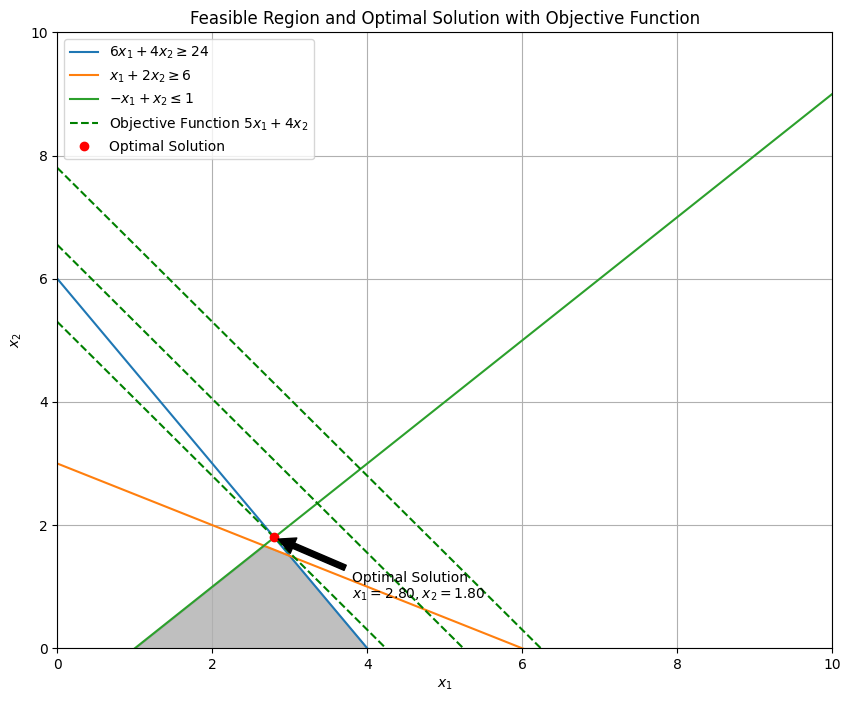

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function
c = [5, 4]

# Coefficients of the inequality constraints (left-hand side)
A = [
    [-6, -4],  # 6x1 + 4x2 >= 24 becomes -6x1 - 4x2 <= -24
    [-1, -2],  # x1 + 2x2 >= 6 becomes -x1 - 2x2 <= -6
    [1, -1]    # -x1 + x2 <= 1 becomes x1 - x2 <= 1
]

# Right-hand side of the inequality constraints
b = [-24, -6, 1]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, method='highs')

# Define the constraints
x = np.linspace(0, 10, 400)
y1 = (24 - 6 * x) / 4
y2 = (6 - x) / 2
y3 = x - 1

# Plot the feasible region
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$6x_1 + 4x_2 \geq 24$')
plt.plot(x, y2, label=r'$x_1 + 2x_2 \geq 6$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Fill feasible region
y4 = np.minimum(np.minimum(y1, y2), y3)
plt.fill_between(x, 0, y4, where=(y4 >= 0), color='grey', alpha=0.5)

# Plot the objective function lines
x1_vals = np.linspace(0, 10, 400)
Z = res.fun
for z in [Z, Z + 5, Z + 10]:
    plt.plot(x1_vals, (z - 5 * x1_vals) / 4, 'g--')

plt.plot([], [], 'g--', label='Objective Function $5x_1 + 4x_2$')

# Plot the optimal solution
x_opt, y_opt = res.x
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.annotate(f'Optimal Solution\n$x_1={x_opt:.2f}, x_2={y_opt:.2f}$',
             xy=(x_opt, y_opt), xytext=(x_opt + 1, y_opt - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Optimal Solution with Objective Function')
plt.legend()
plt.grid(True)
plt.show()


## Problem 5

Given:
$$
\text{Minimize } Z = 7x_1 + 3x_2
$$

Subject to:
$$
\begin{align*}
2x_1 + x_2 & \geq 8 \\
x_1 + x_2 & \geq 6 \\
x_1, x_2 & \geq 0
\end{align*}
$$

### Convert to Standard Form

Convert the inequalities into equalities by introducing slack variables:
1. $ 2x_1 + x_2 - s_1 = 8 $
2. $ x_1 + x_2 - s_2 = 6 $

### Initial Simplex Tableau

The initial simplex tableau is:

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
s_1 & 2 & 1 & 1 & 0 & 8 \\
s_2 & 1 & 1 & 0 & 1 & 6 \\
\hline
Z & -7 & -3 & 0 & 0 & 0 \\
\end{array}
$$

### Iteration 1

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-7$ for $x_1$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{8}{2} = 4, \quad \frac{6}{1} = 6
   $$
   The smallest ratio is 4, so $ s_1 $ will leave the basis.
3. **Pivot:** Pivot around the element 2 in the first row, first column.

### Updated Tableau After Iteration 1

Divide the pivot row by 2 (the pivot element):

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
x_1 & 1 & \frac{1}{2} & \frac{1}{2} & 0 & 4 \\
s_2 & 0 & \frac{1}{2} & -\frac{1}{2} & 1 & 2 \\
\hline
Z & 0 & -\frac{5}{2} & \frac{7}{2} & 0 & 28 \\
\end{array}
$$

### Iteration 2

1. **Identify the entering variable:** The most negative coefficient in the Z-row is $-\frac{5}{2}$ for $x_2$.
2. **Identify the leaving variable:** Perform the minimum ratio test:
   $$
   \frac{\text{RHS}}{\text{Pivot column}} = \frac{4}{\frac{1}{2}} = 8, \quad \frac{2}{\frac{1}{2}} = 4
   $$
   The smallest ratio is 4, so $ s_2 $ will leave the basis.
3. **Pivot:** Pivot around the element $\frac{1}{2}$ in the second row, second column.

### Updated Tableau After Iteration 2

Divide the pivot row by $\frac{1}{2}$ (the pivot element):

$$
\begin{array}{c|ccccc}
\text{Basis} & x_1 & x_2 & s_1 & s_2 & \text{RHS} \\
\hline
x_1 & 1 & 0 & 1 & -1 & 2 \\
x_2 & 0 & 1 & -1 & 2 & 4 \\
\hline
Z & 0 & 0 & -1 & 4 & 24 \\
\end{array}
$$

### Final Solution

From the final tableau, we read off the solution:

$$
x_1 = 0, \quad x_2 = 8
$$

### Objective Function Value

The optimal value of the objective function $ Z $ is:
$$
Z = 7 \times 0 + 3 \times 8 = 0 + 24 = 24
$$

This matches the result from `scipy.optimize.linprog`.

In [5]:
from scipy.optimize import linprog

c = [7, 3]
A = [
    [-2, -1],  # 2x1 + x2 >= 8 becomes -2x1 - x2 <= -8
    [-1, -1]   # x1 + x2 >= 6 becomes -x1 - x2 <= -6
]
b = [-8, -6]

res = linprog(c, A_ub=A, b_ub=b, method='highs')
res.fun, res.x


(24.0, array([0., 8.]))

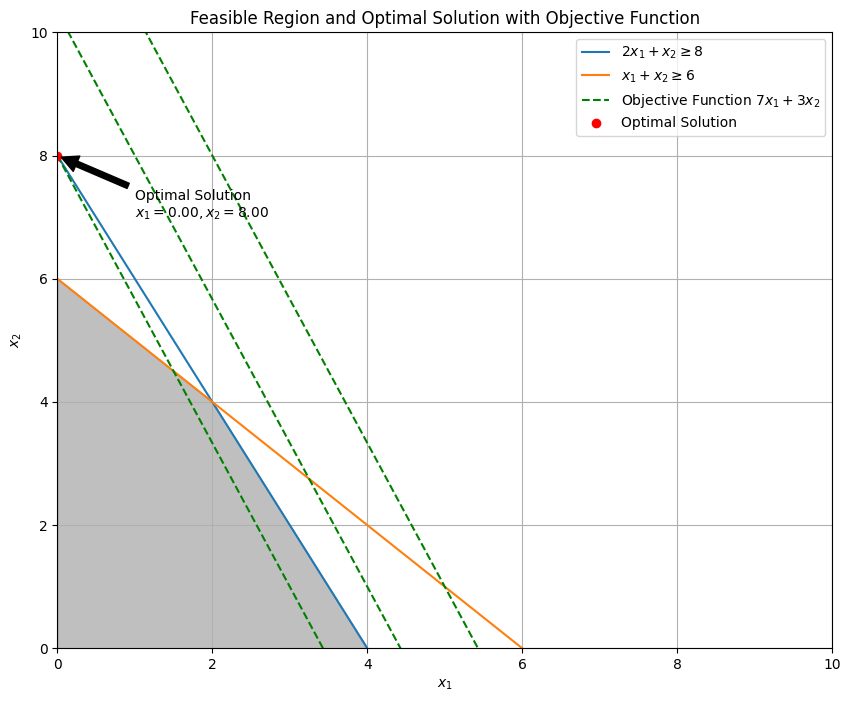

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function
c = [7, 3]

# Coefficients of the inequality constraints (left-hand side)
A = [
    [-2, -1],  # 2x1 + x2 >= 8 becomes -2x1 - x2 <= -8
    [-1, -1],  # x1 + x2 >= 6 becomes -x1 - x2 <= -6
]

# Right-hand side of the inequality constraints
b = [-8, -6]

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, method='highs')

# Define the constraints
x = np.linspace(0, 10, 400)
y1 = (8 - 2 * x)
y2 = (6 - x)

# Plot the feasible region
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$2x_1 + x_2 \geq 8$')
plt.plot(x, y2, label=r'$x_1 + x_2 \geq 6$')

plt.xlim(0, 10)
plt.ylim(0, 10)

# Fill feasible region
y4 = np.minimum(y1, y2)
plt.fill_between(x, 0, y4, where=(y4 >= 0), color='grey', alpha=0.5)

# Plot the objective function lines
x1_vals = np.linspace(0, 10, 400)
Z = res.fun
for z in [Z, Z + 7, Z + 14]:
    plt.plot(x1_vals, (z - 7 * x1_vals) / 3, 'g--')

plt.plot([], [], 'g--', label='Objective Function $7x_1 + 3x_2$')

# Plot the optimal solution
x_opt, y_opt = res.x
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.annotate(f'Optimal Solution\n$x_1={x_opt:.2f}, x_2={y_opt:.2f}$',
             xy=(x_opt, y_opt), xytext=(x_opt + 1, y_opt - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and legend
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Optimal Solution with Objective Function')
plt.legend()
plt.grid(True)
plt.show()
